# LIBRARY 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# DATA

In [2]:
import pandas as pd
data = pd.read_csv('../data/riceClassification.csv')

# DATA EXPLORATION

In [3]:
# Data Exploration
print("Shape of data:", data.shape)
print(data.head())
print(data.info())
print(data.describe())
print("Class distribution:")
print(data.iloc[:, -1].value_counts())

Shape of data: (18185, 12)
   id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (

# PREPROCESSING

In [4]:
# Preprocessing
# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode labels if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (14548, 11)
Test data shape: (3637, 11)


# Eksperimen Perbandingan Konfigurasi Model

In [18]:
# Eksperimen Perbandingan Konfigurasi Model
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import classification_report

# Daftar konfigurasi untuk eksperimen
optimizers = ['adam', 'sgd', 'rmsprop']
activations = ['relu', 'tanh', 'sigmoid']

# Simpan hasil eksperimen
results = []

for opt in optimizers:
    for act in activations:
        print(f"\n--- Eksperimen: Optimizer={opt}, Activation={act} ---")
        
        # Buat model
        model = tf.keras.Sequential([
            tf.keras.Input(shape=(X_train.shape[1],)),
            layers.Dense(16, activation=act),
            layers.Dense(len(np.unique(y)), activation='softmax')
        ])
        
        # Compile model
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Train model
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
        
        # Evaluate
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        
        # Compute predictions and classification report
        y_pred = model.predict(X_test, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        report = classification_report(y_test, y_pred_classes, output_dict=True)
        
        # Extract macro averages
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        
        # Simpan hasil
        results.append({
            'optimizer': opt,
            'activation': act,
            'test_accuracy': test_acc,
            'test_loss': test_loss,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'history': history.history
        })
        
        print(f"Test Accuracy: {test_acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")


--- Eksperimen: Optimizer=adam, Activation=relu ---
Test Accuracy: 0.9997, Precision: 0.9997, Recall: 0.9998, F1-Score: 0.9997

--- Eksperimen: Optimizer=adam, Activation=tanh ---
Test Accuracy: 0.9997, Precision: 0.9997, Recall: 0.9998, F1-Score: 0.9997

--- Eksperimen: Optimizer=adam, Activation=tanh ---
Test Accuracy: 0.9997, Precision: 0.9997, Recall: 0.9998, F1-Score: 0.9997

--- Eksperimen: Optimizer=adam, Activation=sigmoid ---
Test Accuracy: 0.9997, Precision: 0.9997, Recall: 0.9998, F1-Score: 0.9997

--- Eksperimen: Optimizer=adam, Activation=sigmoid ---
Test Accuracy: 0.9997, Precision: 0.9998, Recall: 0.9997, F1-Score: 0.9997

--- Eksperimen: Optimizer=sgd, Activation=relu ---
Test Accuracy: 0.9997, Precision: 0.9998, Recall: 0.9997, F1-Score: 0.9997

--- Eksperimen: Optimizer=sgd, Activation=relu ---
Test Accuracy: 0.9986, Precision: 0.9987, Recall: 0.9985, F1-Score: 0.9986

--- Eksperimen: Optimizer=sgd, Activation=tanh ---
Test Accuracy: 0.9986, Precision: 0.9987, Recall

# EVALUATING

In [ ]:
# Evaluating
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tabel Performa Model:
  optimizer activation  test_accuracy  test_loss  precision    recall  \
0      adam       relu       0.999725   0.000517   0.999694  0.999751   
1      adam       tanh       0.999725   0.000730   0.999694  0.999751   
2      adam    sigmoid       0.999725   0.001532   0.999751  0.999694   
3       sgd       relu       0.998625   0.005999   0.998697  0.998525   
4       sgd       tanh       0.999725   0.004077   0.999751  0.999694   
5       sgd    sigmoid       0.998350   0.017235   0.998390  0.998276   
6   rmsprop       relu       0.999725   0.000763   0.999694  0.999751   
7   rmsprop       tanh       0.999725   0.000225   0.999694  0.999751   
8   rmsprop    sigmoid       0.999725   0.000436   0.999694  0.999751   

   f1_score  
0  0.999722  
1  0.999722  
2  0.999722  
3  0.998610  
4  0.999722  
5  0.998333  
6  0.999722  
7  0.999722  
8  0.999722  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11572\4218269582.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


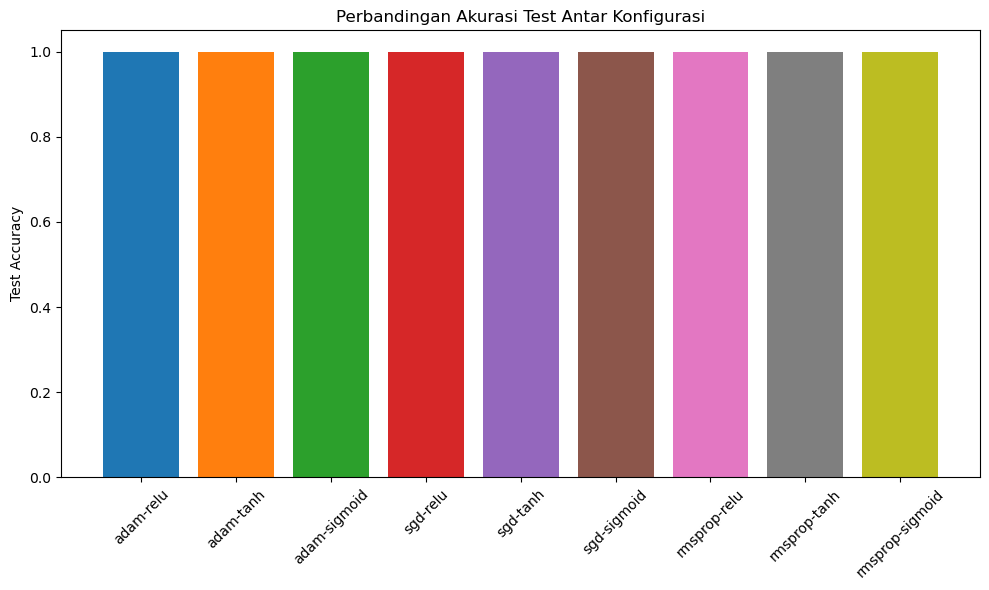


Konfigurasi Terbaik: Optimizer=adam, Activation=relu, Accuracy=0.9997, Precision=0.9997, Recall=0.9998, F1-Score=0.9997


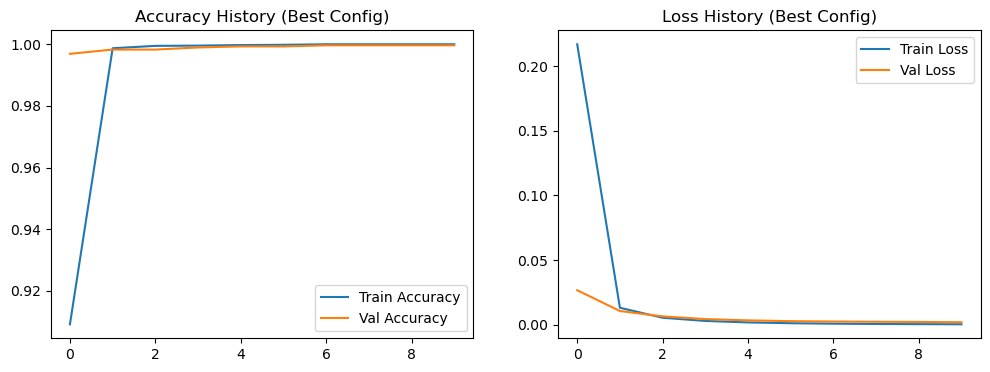

In [19]:
# Pelaporan Performa Eksperimen
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame dari hasil
df_results = pd.DataFrame(results)
print("Tabel Performa Model:")
print(df_results[['optimizer', 'activation', 'test_accuracy', 'test_loss', 'precision', 'recall', 'f1_score']])

# Plot perbandingan akurasi
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in df_results.iterrows():
    label = f"{row['optimizer']}-{row['activation']}"
    ax.bar(label, row['test_accuracy'], label=label)

ax.set_ylabel('Test Accuracy')
ax.set_title('Perbandingan Akurasi Test Antar Konfigurasi')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# Plot loss untuk konfigurasi terbaik (opsional)
best_idx = df_results['test_accuracy'].idxmax()
best_config = df_results.iloc[best_idx]
print(f"\nKonfigurasi Terbaik: Optimizer={best_config['optimizer']}, Activation={best_config['activation']}, Accuracy={best_config['test_accuracy']:.4f}, Precision={best_config['precision']:.4f}, Recall={best_config['recall']:.4f}, F1-Score={best_config['f1_score']:.4f}")

# Plot history untuk konfigurasi terbaik
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(best_config['history']['accuracy'], label='Train Accuracy')
plt.plot(best_config['history']['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy History (Best Config)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_config['history']['loss'], label='Train Loss')
plt.plot(best_config['history']['val_loss'], label='Val Loss')
plt.title('Loss History (Best Config)')
plt.legend()
plt.show()

# REPORT

Optimizer,Activation,Test Accuracy,Test Loss,Precision,Recall,F1-Score
adam,relu,0.9997,0.0005,0.9997,0.9998,0.9997
adam,tanh,0.9997,0.0007,0.9997,0.9998,0.9997
adam,sigmoid,0.9997,0.0015,0.9998,0.9997,0.9997
sgd,relu,0.9986,0.0060,0.9987,0.9985,0.9986
sgd,tanh,0.9997,0.0041,0.9998,0.9997,0.9997
sgd,sigmoid,0.9984,0.0172,0.9984,0.9983,0.9983
rmsprop,relu,0.9997,0.0008,0.9997,0.9998,0.9997
rmsprop,tanh,0.9997,0.0002,0.9997,0.9998,0.9997
rmsprop,sigmoid,0.9997,0.0004,0.9997,0.9998,0.9997

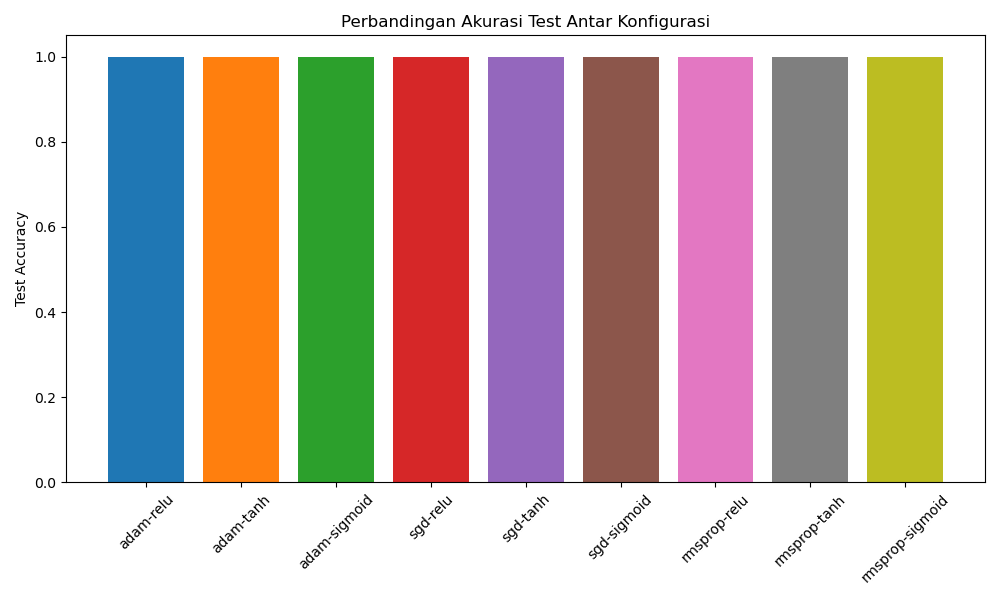
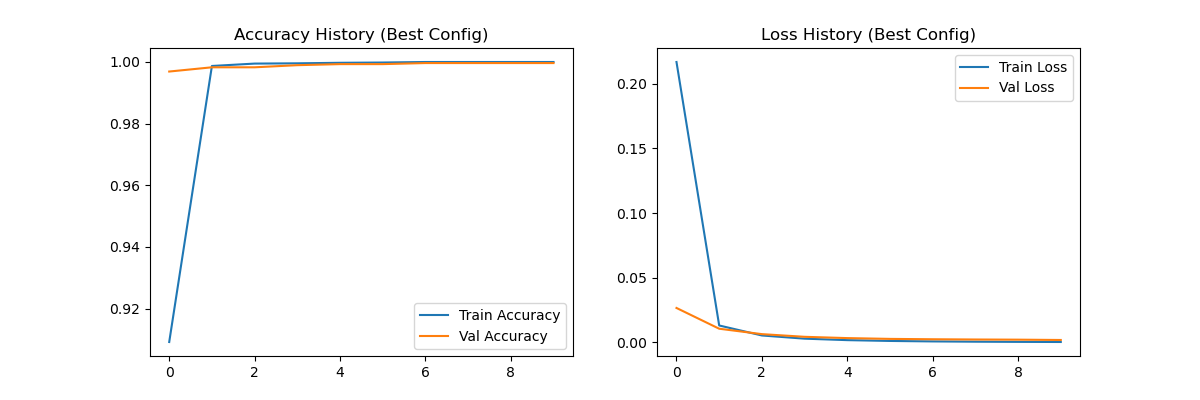

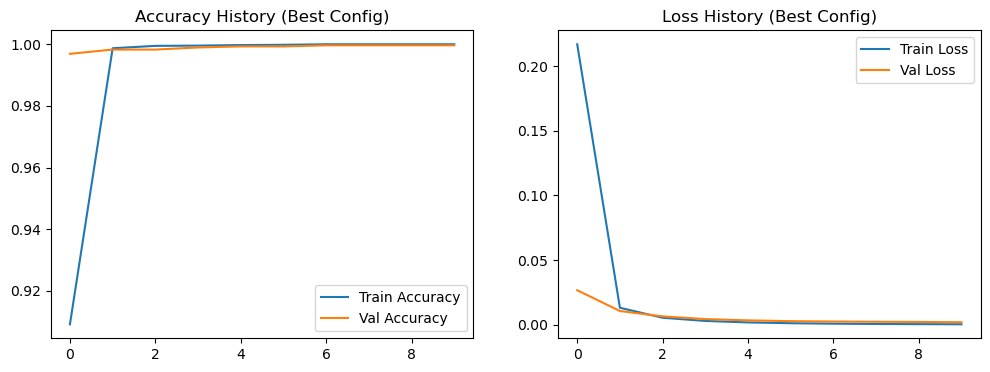

In [20]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import io
import base64

# Fungsi untuk mengkonversi plot ke base64
def plot_to_base64(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return f"data:image/png;base64,{image_base64}"

# Buat HTML laporan
html = """
<h1>Laporan Hasil Klasifikasi</h1>

<h2>Arsitektur Model</h2>
<p>Model menggunakan arsitektur Sequential dengan layer-layer berikut:</p>
<ul>
    <li>Input(shape=(X_train.shape[1],))</li>
    <li>Dense(16, activation=activation_function)</li>
    <li>Dense(len(np.unique(y)), activation='softmax')</li>
</ul>

<h2>Parameter yang Dicoba</h2>
<p>Eksperimen dilakukan dengan kombinasi parameter berikut:</p>
<ul>
    <li><strong>Optimizer:</strong> adam, sgd, rmsprop</li>
    <li><strong>Activation Function:</strong> relu, tanh, sigmoid</li>
    <li><strong>Epochs:</strong> 10</li>
    <li><strong>Batch Size:</strong> 32</li>
    <li><strong>Validation Split:</strong> 0.2</li>
</ul>

<h2>Hasil Setiap Percobaan</h2>
<table border="1" style="border-collapse: collapse; width: 100%;">
    <tr>
        <th>Optimizer</th>
        <th>Activation</th>
        <th>Test Accuracy</th>
        <th>Test Loss</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
    </tr>
"""

for _, row in df_results.iterrows():
    html += f"""
    <tr>
        <td>{row['optimizer']}</td>
        <td>{row['activation']}</td>
        <td>{row['test_accuracy']:.4f}</td>
        <td>{row['test_loss']:.4f}</td>
        <td>{row['precision']:.4f}</td>
        <td>{row['recall']:.4f}</td>
        <td>{row['f1_score']:.4f}</td>
    </tr>
"""

html += """
</table>

<h2>Konfigurasi Terbaik</h2>
<p>Konfigurasi terbaik berdasarkan test accuracy tertinggi:</p>
<ul>
    <li><strong>Optimizer:</strong> """ + str(best_config['optimizer']) + """</li>
    <li><strong>Activation:</strong> """ + str(best_config['activation']) + """</li>
    <li><strong>Test Accuracy:</strong> """ + f"{best_config['test_accuracy']:.4f}" + """</li>
    <li><strong>Test Loss:</strong> """ + f"{best_config['test_loss']:.4f}" + """</li>
    <li><strong>Precision:</strong> """ + f"{best_config['precision']:.4f}" + """</li>
    <li><strong>Recall:</strong> """ + f"{best_config['recall']:.4f}" + """</li>
    <li><strong>F1-Score:</strong> """ + f"{best_config['f1_score']:.4f}" + """</li>
</ul>

<h2>Grafik Perbandingan Akurasi</h2>
<img src=\"""" + plot_to_base64(fig) + """\" alt="Perbandingan Akurasi" style="width:100%; max-width:800px;">

<h2>History Training untuk Konfigurasi Terbaik</h2>
"""

# Buat plot history lagi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(best_config['history']['accuracy'], label='Train Accuracy')
plt.plot(best_config['history']['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy History (Best Config)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_config['history']['loss'], label='Train Loss')
plt.plot(best_config['history']['val_loss'], label='Val Loss')
plt.title('Loss History (Best Config)')
plt.legend()
history_fig = plt.gcf()
html += """<img src=\"""" + plot_to_base64(history_fig) + """\" alt="History Training" style="width:100%; max-width:800px;">"""

html += """
</body>
</html>
"""

display(HTML(html))

In [21]:
# simpan laporan ke file HTML
with open('laporan_klasifikasi.html', 'w') as f:
    f.write(html)